In [2]:
#conda install -c conda-forge pydotplus
import warnings # Ignoreing all the warning
warnings.filterwarnings("ignore")
import os
import numpy
import pandas as pd
import numpy as np
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as pyplot
import seaborn as sns
from sklearn.tree  import export_graphviz 
import pydotplus as pdot 
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score
%matplotlib inline

In [3]:
df=pd.read_csv('C:/Users/user/Desktop/zoo.csv')

In [4]:
df.head(5)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
df['class_type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: class_type, dtype: int64

In [6]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


(array([41., 20.,  5., 13.,  4.,  8., 10.]),
 array([1.        , 1.85714286, 2.71428571, 3.57142857, 4.42857143,
        5.28571429, 6.14285714, 7.        ]),
 <a list of 7 Patch objects>)

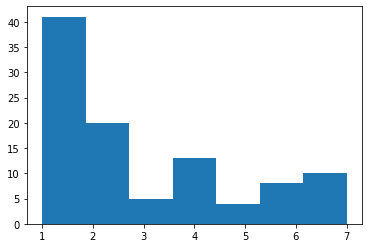

In [7]:
pyplot.hist(df['class_type'],bins=7)

In [9]:
X_features=list(df.columns)

In [10]:
X_features.remove('class_type')
X_features.remove('animal_name')

In [11]:
list(df.columns)

['animal_name',
 'hair',
 'feathers',
 'eggs',
 'milk',
 'airborne',
 'aquatic',
 'predator',
 'toothed',
 'backbone',
 'breathes',
 'venomous',
 'fins',
 'legs',
 'tail',
 'domestic',
 'catsize',
 'class_type']

In [12]:
Categorical_features=['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','tail',
 'domestic','catsize']

In [13]:
encoded_df = pd.get_dummies(df[X_features],columns =Categorical_features, drop_first = True )

In [14]:
train_X, test_X, train_y, test_y = train_test_split(encoded_df,df['class_type'], train_size = 0.8, random_state = 42 ) 

In [15]:
clf = DecisionTreeClassifier()
parameters = {
    'criterion': ['gini','entropy'],
    'splitter' : ['best','random'],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [2,5,10],
    'max_leaf_nodes' : [None,2,5,10],
    'max_depth' : [10,8,6,3],
    'random_state': [42],
}

grid = GridSearchCV(clf, parameters, n_jobs=-1, cv=3,verbose=1, scoring="accuracy")

In [16]:
# Fit the model
grid.fit(train_X, train_y)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 1728 out of 1728 | elapsed:    8.0s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 8, 6, 3],
                         '

In [17]:
# Printing best parameters
grid.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_leaf_nodes': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'random_state': 42,
 'splitter': 'random'}

In [19]:
grid.best_score_

0.9375

In [20]:
# Get the best clf
best_clf = grid.best_estimator_

In [21]:
y_pred = best_clf.predict(test_X)
acc = accuracy_score(test_y, y_pred)

print("Accuracy : ", acc)

Accuracy :  0.9523809523809523


In [22]:
clf_tree = DecisionTreeClassifier(criterion= 'gini',max_depth=10,max_leaf_nodes=10,min_samples_leaf=2,min_samples_split=2,
                                  random_state= 42,splitter='random')

In [23]:
clf_tree.fit( train_X,train_y ) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='random')

In [29]:
tree_predict = clf_tree.predict(test_X ) 
metrics.accuracy_score( test_y, tree_predict ) 

0.9523809523809523

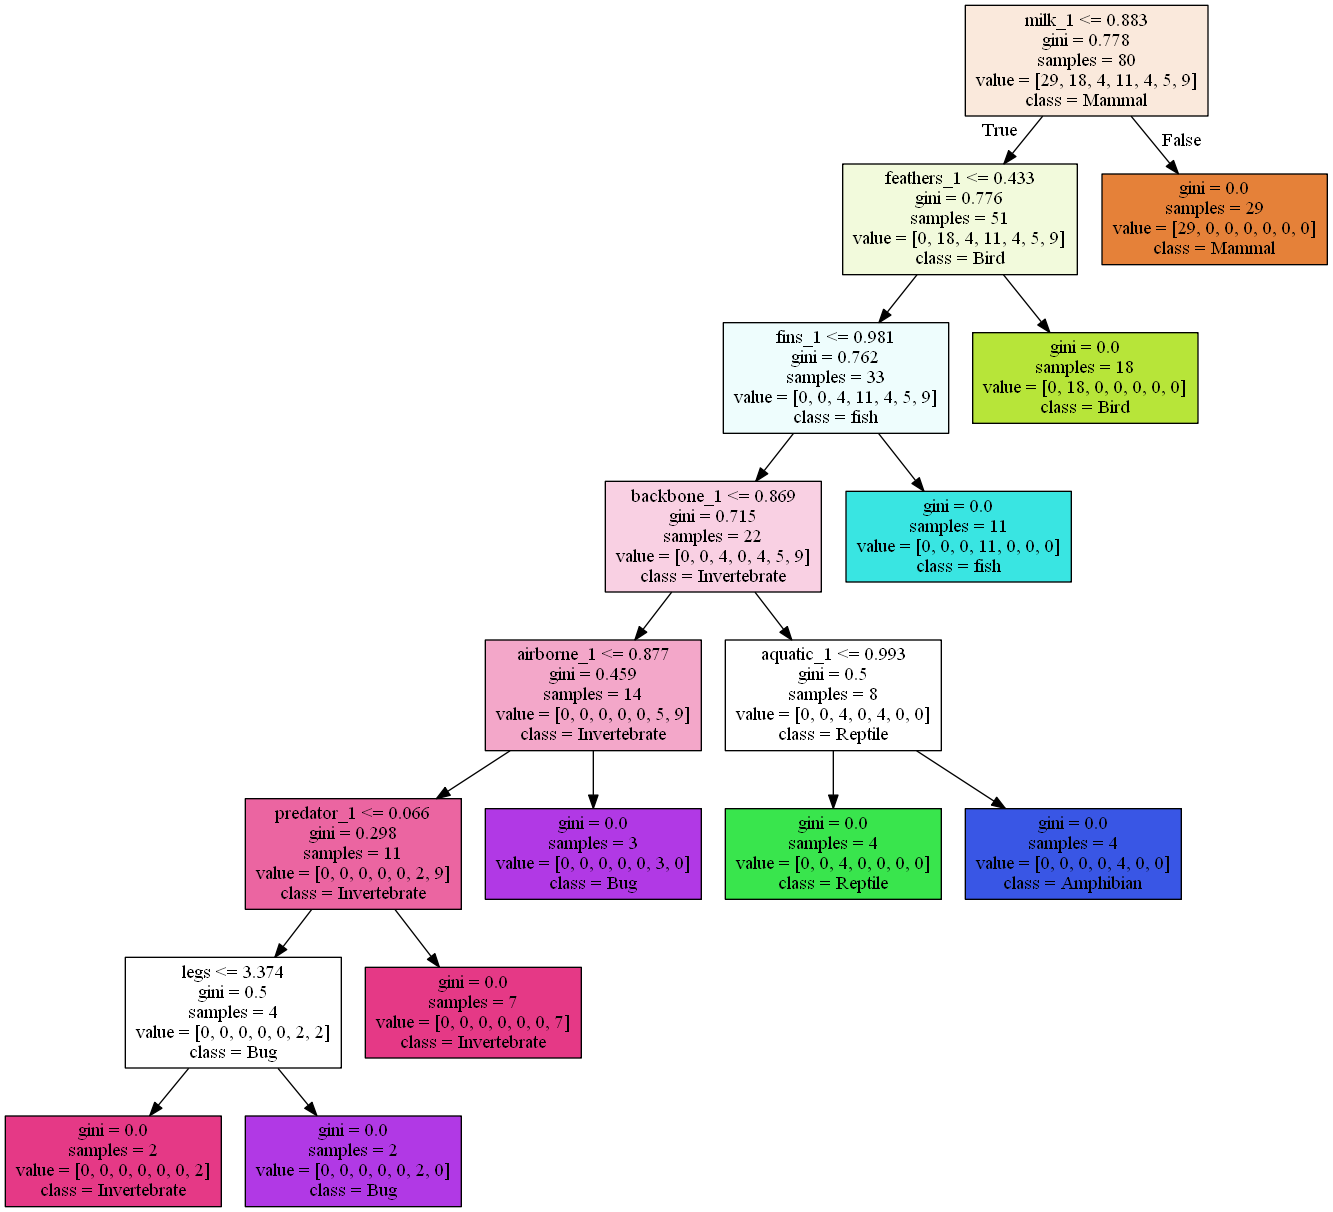

In [24]:
from sklearn import tree
import pydotplus
# Create DOT data
dot_data = tree.export_graphviz(clf_tree, out_file=None, feature_names = train_X.columns,
                                class_names= ['Mammal', 'Bird','Reptile','fish','Amphibian','Bug','Invertebrate'], 
                                filled = True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

from IPython.display import Image
# Show graph
Image(graph.create_png())